In [69]:
import numpy as np
from esgflib.data.datasets import get_melbourne_data, split_train_test_data
from matplotlib import pyplot as plt
from esgflib.features.features import create_training_points

In [205]:
# Get the data
melbourne_data = get_melbourne_data()

In [206]:
# Date d'évaluation
t = "1987"

# Split train and test data
train_data, test_data = split_train_test_data(melbourne_data, split_year=t)

# Index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [207]:
# Create training/test points
history_days = 64
horizon_days = 32
X_train, Y_train = create_training_points(train_data, history_days=history_days, horizon_days=horizon_days)
X_test, Y_test = create_training_points(test_data, history_days=history_days, horizon_days=horizon_days)

In [194]:
# Create the model
from keras.layers import Input, LSTM, Dense
from keras.models import Model

# Input. Got (N, 64, 1).
model_input = Input(shape=(history_days, 1), name='x', dtype='float32')

# Embedding. Got (N, 8).
z = LSTM(8, activation='relu')(model_input)

# Dense. Got (N, 365).
y = Dense(horizon_days, activation='linear')(z)

# Keras model
model_keras = Model(inputs=model_input, outputs=y)

In [196]:
# Compile model
model_keras.compile(optimizer='adam', loss='mse')

In [197]:
# Train the model
model_keras.fit(X_train, Y_train, epochs=32, batch_size=32, verbose=1)

Epoch 1/32
57/57 [==============================] - 1s 9ms/step - loss: 132.0777
Epoch 2/32
57/57 [==============================] - 1s 10ms/step - loss: 131.6955
Epoch 3/32
57/57 [==============================] - 1s 9ms/step - loss: 123.5275
Epoch 4/32
57/57 [==============================] - 1s 10ms/step - loss: 119.5799
Epoch 5/32
57/57 [==============================] - 1s 10ms/step - loss: 114.6476
Epoch 6/32
57/57 [==============================] - 1s 9ms/step - loss: 105.3394
Epoch 7/32
57/57 [==============================] - 1s 9ms/step - loss: 83.4904
Epoch 8/32
57/57 [==============================] - 1s 9ms/step - loss: 53.6148
Epoch 9/32
57/57 [==============================] - 1s 9ms/step - loss: 26.8524
Epoch 10/32
57/57 [==============================] - 1s 9ms/step - loss: 19.2041
Epoch 11/32
57/57 [==============================] - 1s 9ms/step - loss: 15.7167
Epoch 12/32
57/57 [==============================] - 1s 9ms/step - loss: 13.3682
Epoch 13/32
57/57 [=========

In [198]:
y_pred = model_keras.predict(X_train)

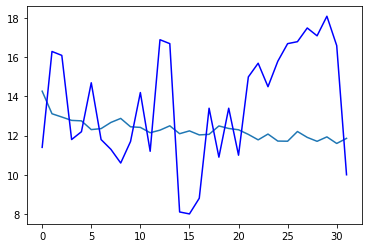

In [204]:
plt.plot(y_pred[0])
plt.plot(Y_train[0], color="blue")